In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import xarray as xr
from shapely.geometry import Point
from sklearn.datasets import make_blobs

import FINE.spagat.dataset as spd
import FINE.spagat.grouping as spg

%matplotlib inline

C:/Users/s.patil/Documents/code/fine/test/spagat/data/output/test


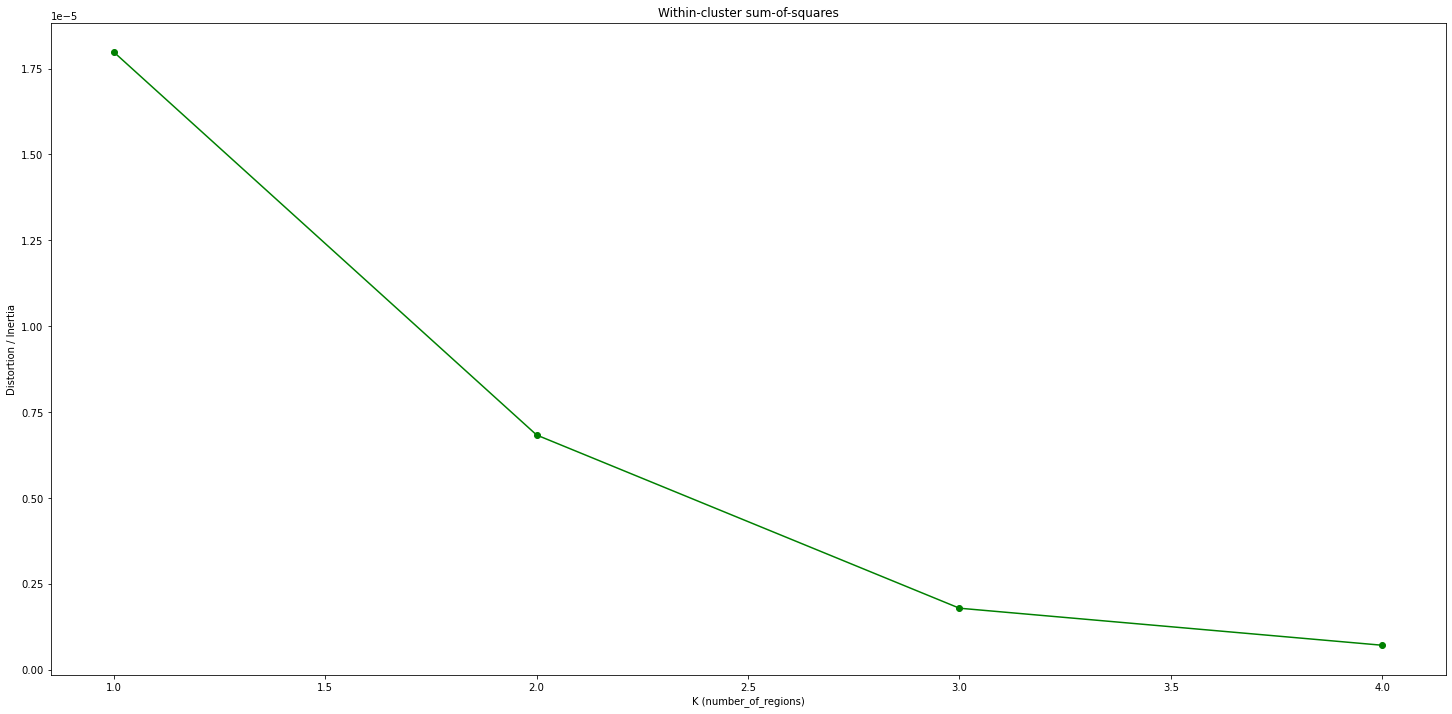

elapsed time for distance_based_clustering: 0.02 minutes


In [6]:
#TEST DATA
component_list = ['c1','c2']  
space_list = ['01_reg','02_reg','03_reg','04_reg','05_reg']
TimeStep_list = ['T0','T1']
Period_list = [0]

dummy_data = np.array([[ [[np.nan for i in range(5)] for i in range(2)] ],
                      [ [[np.nan for i in range(5)] for i in range(2)] ]
                   ])

dummy_DataArray = xr.DataArray(dummy_data, 
                           coords=[component_list, Period_list, TimeStep_list, space_list], 
                           dims=['component', 'Period', 'TimeStep','space'])    

dummy_ds = xr.Dataset({'var': dummy_DataArray}) 

sds = spd.SpagatDataset()
sds.xr_dataset = dummy_ds       

sample_data, sample_labels = make_blobs(n_samples=5, centers=3, n_features=2, random_state=0)

test_centroids = [np.nan for i in range(5)]
for i, data_point in enumerate(sample_data):
  test_centroids[i] = Point(data_point)

sds.add_objects(description ='gpd_centroids',   
        dimension_list =['space'], 
        object_list = test_centroids)


#FUNCTION CALL 
path_to_test_dir = 'C:/Users/s.patil/Documents/code/fine/test/spagat/data/output/'
file_name = 'test'
output_dict = spg.distance_based_clustering(sds, agg_mode = 'sklearn_kmeans', save_path = path_to_test_dir, fig_name=file_name)